<a href="https://colab.research.google.com/github/FrenteBW/Pima-Indians-Diabetes-Classification/blob/main/Pima_Indians_Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data set 출처 & 구성


**데이터셋 출처**
Pima Indians Diabetes Database | Kaggle
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

**데이터 구성**

Pregnancies : 임신 횟수

Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도

BloodPressure : 이완기 혈압 (mm Hg)

SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값

Insulin : 2시간 혈청 인슐린 (mu U / ml)

BMI : 체질량 지수 (체중kg / 키(m)^2)

DiabetesPedigreeFunction : 당뇨병 혈통 기능

Age : 나이

Outcome : 1은 당뇨병을 의미, 0은 당뇨병이 아님을 의미

**데이터 분석 목적**

 임신 횟수, 포도당 농도, 혈압 수치, 피부 두께, 인슐린 수치, 체질량 지수, 나이 등의 데이터를 바탕으로 지도 학습을 수행하여 당뇨병 발병 여부를 예측한다. 

 

# 사용할 Library와 Data set 로드




In [ ]:
import pandas as pd #데이터 분석을 위한 라이브러리
import numpy as np #고성능의 수치계산, 행렬이나 대규모 다차원 배열을 쉽게 처리하기 위한 라이브러리
import seaborn as sns #데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt #데이터 시각화 라이브러리

In [ ]:
# from google.colab import drive #구글 드라이브와 연동하여 파일을 가져올 경우 사용
# drive.mount('/주소값') 

In [ ]:
df = pd.read_csv("/content/diabetes.csv") #데이터 불러오기, 경로는 파일에서 경로복사하는게 편함
df.shape 

(768, 9)

In [ ]:
df.head() #data set의 간략한 참조

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info() #data set Column의 기본 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe() #data set의 각 항에 대한 정보

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
feature_columns = df.columns[0:-1].tolist() #Outcome 값을 제외한 값을 Feature_Column 에 저장
feature_columns 

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
label_name = 'Outcome' #Outcome 값을 label_name에 따로 저장
label_name

'Outcome'

# 데이터 정제

**수치형 변수를 범주형 변수로 변경**

In [ ]:
df["Pregnancies_high"] = df["Pregnancies"] > 6 
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [ ]:
df["Age_low"] = df["Age"] < 30
df["Age_middle"] = (df["Age"] >= 30) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


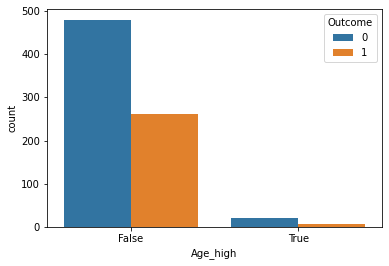

In [ ]:
sns.countplot(data=df, x="Age_high", hue="Outcome")

**결측치 분류**

In [ ]:
cols = feature_columns[1:] #2~8번째 열에 결측치가 있음. 이를 따로 분류하여 cols 에 저장
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
df_null = df[cols].replace(0, np.nan) #값이 0 으로 나오는 결측치들을 NaN으로 대체하고 이를 보기
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

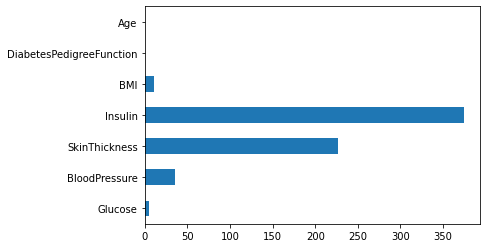

In [ ]:
df_null.sum().plot.barh() #결측치 시각화

In [ ]:
df_null.mean() * 100 #결측치 비율 나타내기, Insulin과 SkinThickness에 결측치 비율이 높음.

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

In [ ]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [ ]:
# 인슐린에 대한 결측치를 중앙값으로 대체하기
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 102.5
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 169.5

In [ ]:
df["SkinThickness_nan"] = df["SkinThickness"].replace(0, np.nan) 
df[["SkinThickness_nan", "SkinThickness"]].head()

,SkinThickness_nan,SkinThickness
0,35.0,35
1,29.0,29
2,NaN,0
3,23.0,23
4,35.0,35


In [ ]:
df["SkinThickness_nan"].mean()

29.153419593345657

In [ ]:
# SkinThickness에 대한 결측치를 중앙값으로 대체하기
df.loc[(df["Outcome"] == 0) & (df["SkinThickness_nan"].isnull()), "SkinThickness_nan"] = 29.1
df.loc[(df["Outcome"] == 1) & (df["SkinThickness_nan"].isnull()), "SkinThickness_nan"] = 30.1

**이상치 다루기**

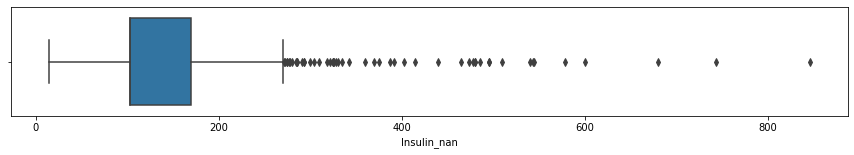

In [ ]:
plt.figure(figsize=(15, 2))
sns.boxplot(data=df, x="Insulin_nan")

In [ ]:
df["Insulin_nan"].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [ ]:
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1
IQR

67.0

In [ ]:
OUT = IQR3 + (IQR * 1.5)
OUT

270.0

In [ ]:
df[df["Insulin_nan"] > OUT].shape

(51, 15)

In [ ]:
df[df["Insulin_nan"] > 600].shape

(3, 15)

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["Glucose", "DiabetesPedigreeFunction"]])
scale = scaler.transform(df[["Glucose", "DiabetesPedigreeFunction"]])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

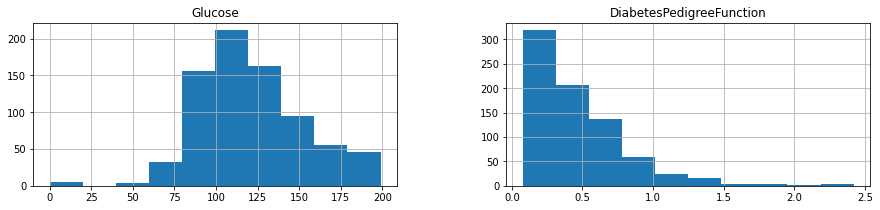

In [ ]:
h = df[["Glucose", "DiabetesPedigreeFunction"]].hist(figsize=(15, 3))

# CSV 파일로 저장하기

In [ ]:
df.to_csv("/content/diabetes_features.csv", index=False) #content에 diabetes_features 라는 이름의 정제된 데이터 저장

In [ ]:
pd.read_csv("/content/diabetes_features.csv").head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,SkinThickness_nan
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,35.0
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,29.0
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,30.1
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,23.0
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,35.0


# 학습, 예측 Data set 만들기

In [ ]:
df = pd.read_csv("/content/diabetes_features.csv", encoding='cp949') #데이터 불러오기
df.shape

(768, 15)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,SkinThickness_nan
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,35.0
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,29.0
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,30.1
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,23.0
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,35.0


In [ ]:
split_count = int(df.shape[0] * 0.8) #80%를 학습 세트로 저장, 80%에 해당하는 값은 614, split_count 는 int 값임. 
split_count

614

In [ ]:
train = df[:split_count].copy() #614개 만큼의 학습 세트 train 값에 저장
train.shape

(614, 15)

In [ ]:
train[train["Insulin_nan"] < 600].shape

(610, 15)

In [ ]:
train = train[train["Insulin_nan"] < 600]
train.shape

(610, 15)

In [ ]:
test = df[split_count:].copy() #나머지 154개는 예측 세트로 test 값에 저장
test.shape

(154, 15)

In [ ]:
label_name = "Outcome" # label_name 이라는 변수에 예측할 컬럼의 이름 담기.
label_name

'Outcome'

In [ ]:
feature_names = train.columns[:-1].tolist() #처음부터 마지막에서 두번째 열 까지 분류, 마지막 값을 예측할 예정
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Pregnancies_high',
 'Age_low',
 'Age_middle',
 'Age_high',
 'Insulin_nan']

In [ ]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져오고, 안쓸 항목은 제외.
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("SkinThickness")
feature_names

['Glucose',
 'BloodPressure',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'SkinThickness_nan']

In [ ]:
X_train = train[feature_names] #학습 세트 만들기, (시험의 기출문제)
print(X_train.shape)
X_train.head()

(610, 8)


,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,SkinThickness_nan
0,148,72,33.6,0.627,50,False,169.5,35.0
1,85,66,26.6,0.351,31,False,102.5,29.0
2,183,64,23.3,0.672,32,True,169.5,30.1
3,89,66,28.1,0.167,21,False,94.0,23.0
4,137,40,43.1,2.288,33,False,168.0,35.0


In [ ]:
y_train = train[label_name] #정답 값 만들기, (기출 문제의 답)
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
X_test = test[feature_names] #예측에 사용할 데이터 세트(실전 문제)
print(X_test.shape)
X_test.head()

(154, 8)


,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,SkinThickness_nan
614,138,74,36.1,0.557,50,True,144.0,26.0
615,106,72,25.8,0.207,27,False,102.5,29.1
616,117,96,28.7,0.157,30,False,102.5,29.1
617,68,62,20.1,0.257,23,False,15.0,13.0
618,112,82,28.2,1.282,50,True,169.5,24.0


In [ ]:
y_test = test[label_name] #예측의 답, (실전 문제의 답)
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 머신러닝 알고리즘 가져오기

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = model.predict(X_test) #예측, 괄호 안에 문제만 넣어주고 답은 넣지않음
y_predict[:5]

array([1, 0, 0, 0, 1])

[Text(0.5481770833333334, 0.9615384615384616, 'Insulin_nan <= 143.5\ngini = 0.453\nsamples = 610\nvalue = [399, 211]'),
 Text(0.3298611111111111, 0.8846153846153846, 'Insulin_nan <= 109.0\ngini = 0.163\nsamples = 380\nvalue = [346, 34]'),
 Text(0.25, 0.8076923076923077, 'BMI <= 49.95\ngini = 0.098\nsamples = 329\nvalue = [312, 17]'),
 Text(0.2361111111111111, 0.7307692307692307, 'Glucose <= 151.5\ngini = 0.082\nsamples = 326\nvalue = [312, 14]'),
 Text(0.2013888888888889, 0.6538461538461539, 'Insulin_nan <= 99.5\ngini = 0.062\nsamples = 312\nvalue = [302, 10]'),
 Text(0.1875, 0.5769230769230769, 'Insulin_nan <= 95.5\ngini = 0.154\nsamples = 119\nvalue = [109, 10]'),
 Text(0.1736111111111111, 0.5, 'BloodPressure <= 83.0\ngini = 0.127\nsamples = 117\nvalue = [109, 8]'),
 Text(0.1111111111111111, 0.4230769230769231, 'DiabetesPedigreeFunction <= 0.677\ngini = 0.088\nsamples = 108\nvalue = [103, 5]'),
 Text(0.05555555555555555, 0.34615384615384615, 'SkinThickness_nan <= 31.5\ngini = 0.044\n

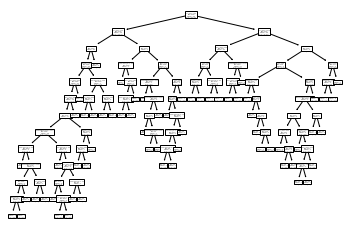

In [ ]:
from sklearn.tree import plot_tree #트리를 문자로 나타냄

plot_tree(model, feature_names=feature_names)

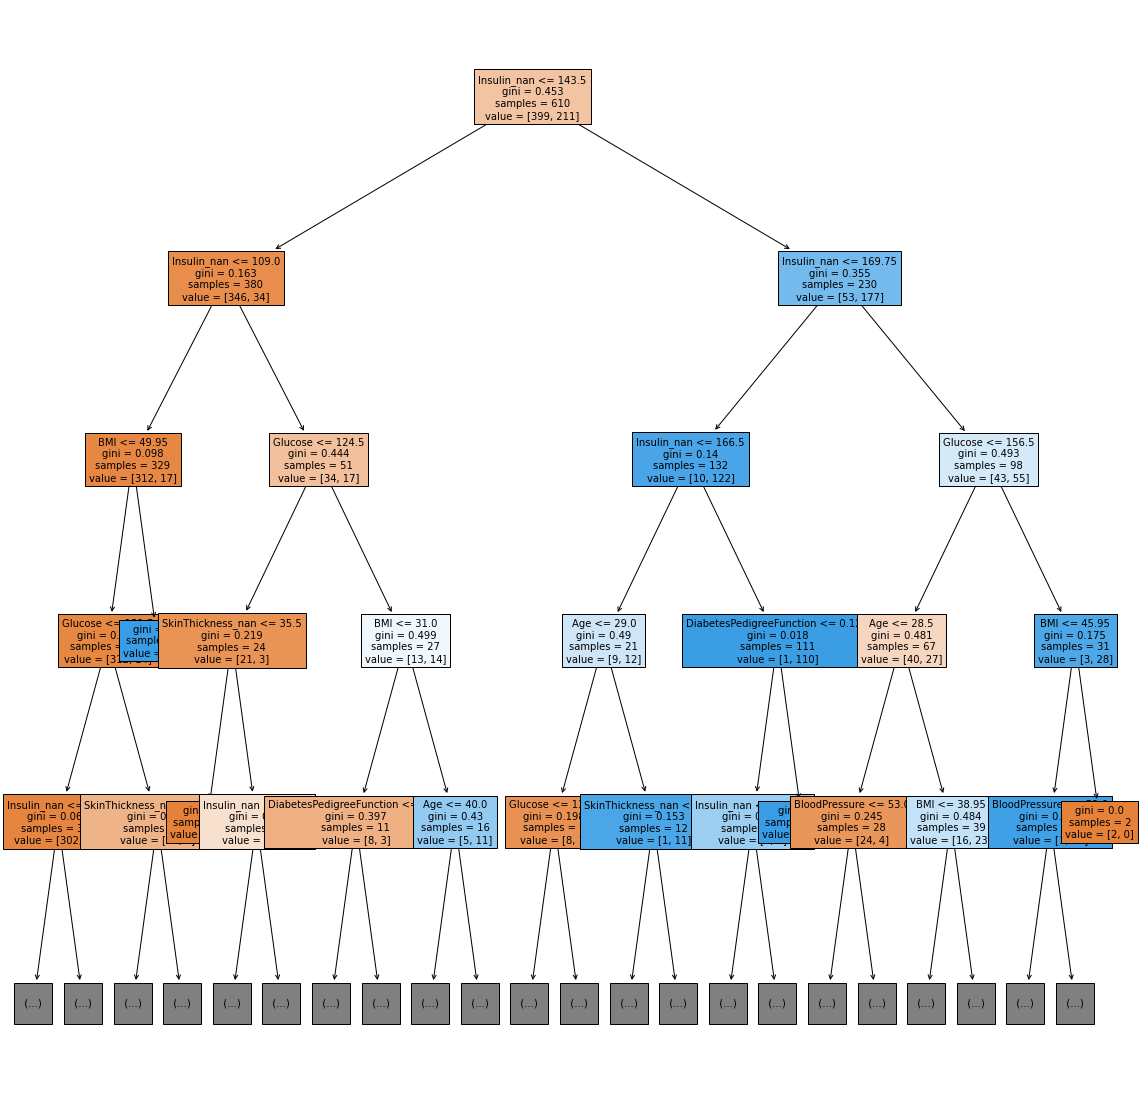

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 max_depth=4,
                 filled=True,
                 fontsize=10)

In [ ]:
# 피처의 중요도를 추출하기

model.feature_importances_

array([0.1013416 , 0.03484288, 0.0716271 , 0.03025271, 0.0649216 ,
       0.        , 0.64448333, 0.05253078])

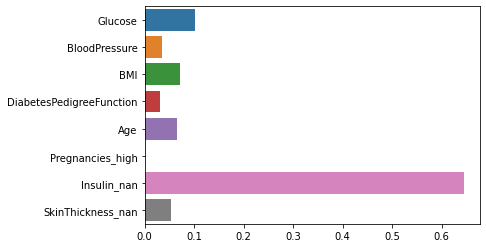

In [ ]:
# 피처의 중요도 시각화 하기

sns.barplot(x=model.feature_importances_, y=feature_names)

# 정확도 측정 및 평가

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

88.96103896103897

# 가장 높은 성능을 보이는 Max_depth 값 & 최적의 Hyper parameter 찾기

In [ ]:
from sklearn.tree import DecisionTreeClassifier #DecisionTreeClassifier 사용
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score #Max_depth가 3~5 일 때 가장 높은 성능 나타냄

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 89.6103896103896
4 89.6103896103896
5 89.6103896103896
6 88.31168831168831
7 88.31168831168831
8 88.31168831168831
9 88.31168831168831
10 88.31168831168831
11 88.31168831168831


**GridSearchCV 사용시**

In [ ]:
from sklearn.model_selection import GridSearchCV #GridSearchCV 사용

model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12),
"max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [ ]:
clf.best_params_ #가장 성능이 좋은 max_depth와 max_features 값 찾기

{'max_depth': 4, 'max_features': 0.9}

In [ ]:
clf.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [ ]:
clf.score(X_test, y_test) 

0.8961038961038961

**RandomizedSearchCV 사용시**

In [ ]:
param_distributions = {"max_depth" : range(2,20), "max_features" : [0.1, 0.3, 0.5, 0.7, 0.9, 1]}
param_distributions

{'max_depth': range(2, 20), 'max_features': [0.1, 0.3, 0.5, 0.7, 0.9, 1]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV #RandomizedSearchCV 사용

clf = RandomizedSearchCV(model,
    param_distributions,
    n_iter=10,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
    random_state=42
    )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 20),
                                        'max_features': [0.1, 0.3, 0.5, 0.7,
                                                         0.9, 1]},
                   random_state=42, scoring='accuracy')

In [ ]:
clf.best_params_ #최선의 max_depth 값과 Max_features 값 출력

{'max_depth': 3, 'max_features': 0.9}

In [ ]:
clf.score(X_test, y_test) #적중 결과 출력

0.8961038961038961

**Randomforest 사용시**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #Randomforest 사용

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [ ]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score #결과 예측(결과 향상)

accuracy_score(y_test, y_predict)

0.9155844155844156

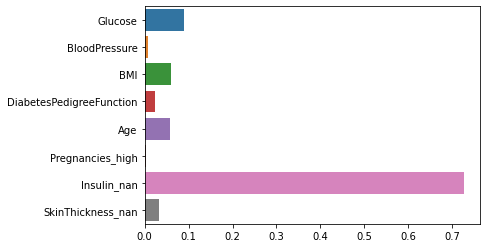

In [ ]:
feature_names = X_train.columns.tolist() #가장 중요했던 요인 나타냄
 
sns.barplot(x=model.feature_importances_, y=feature_names)

**GradientBoostingClassifier 사용시**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #GradientBoostingClassifier 사용

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [ ]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
model.feature_importances_

array([0.08869225, 0.00804312, 0.06022674, 0.02426163, 0.05693167,
       0.00244204, 0.72587482, 0.03352771])

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score #가장 높은 결과 출력

accuracy_score(y_test, y_predict)

0.9155844155844156